# **UNDERSTAND** the difference between Interpolation and Extrapolation

## Interplotation
 - Choosing specific date range and trying to predict the future.
 - Prediction made are completely supervised.
 - **Aim** here is to **choose a specific date range** and **predict the future**.
 
## Extrapolation
 - Output will be predicted using previous time stamps.
 - We are dependent only on time lags(T, T+1, T-1...)
 - **Aim** here is to **forcast for future using past lags**.

# Smoothing Time Series

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
df = pdr.get_data_fred('GS10')

In [13]:
df.head(10)

,GS10
DATE,
2019-11-01,1.81
2019-12-01,1.86
2020-01-01,1.76
2020-02-01,1.50
2020-03-01,0.87
2020-04-01,0.66
2020-05-01,0.67
2020-06-01,0.73
2020-07-01,0.62


## Smoothing with rolling value 10

In [37]:
df['GS10 ROLL'] = df['GS10']. rolling(10).mean()

<Axes: xlabel='DATE'>

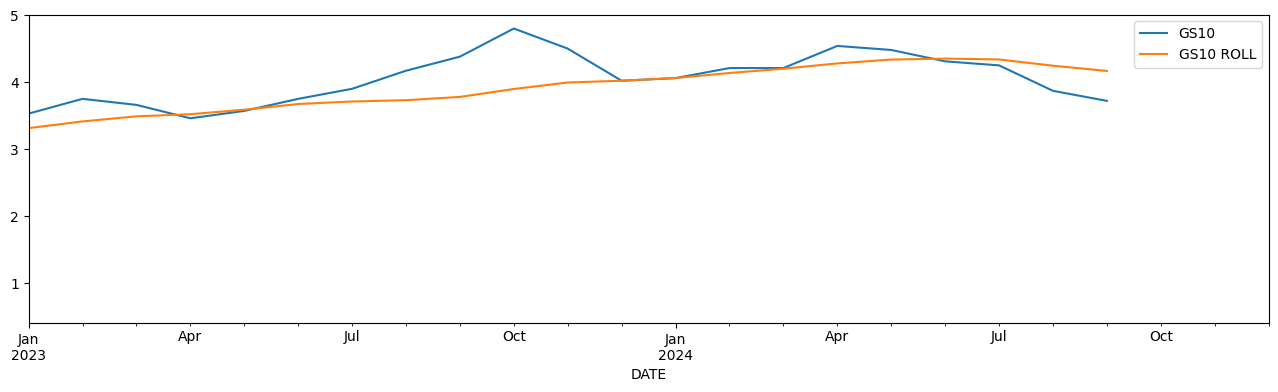

In [40]:
df[['GS10','GS10 ROLL']].plot(figsize = (16,4), xlim=['2023-01-01','2024-12-31'])

In [50]:
df.head(20)

,GS10,GS10 ROLL
DATE,,
2019-11-01,1.81,NaN
2019-12-01,1.86,NaN
2020-01-01,1.76,NaN
2020-02-01,1.50,NaN
2020-03-01,0.87,NaN
2020-04-01,0.66,NaN
2020-05-01,0.67,NaN
2020-06-01,0.73,NaN
2020-07-01,0.62,NaN


<Axes: xlabel='DATE'>

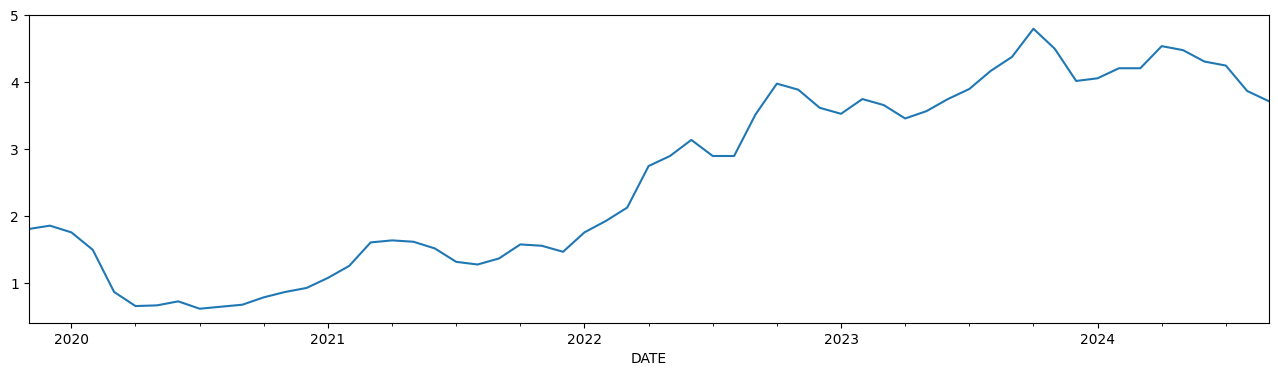

In [51]:
df['GS10'].plot(figsize=(16,4))

## Smoothing with rolling value 15

In [57]:
df['GS10 ROLL'] = df['GS10']. rolling(15).mean()

<Axes: xlabel='DATE'>

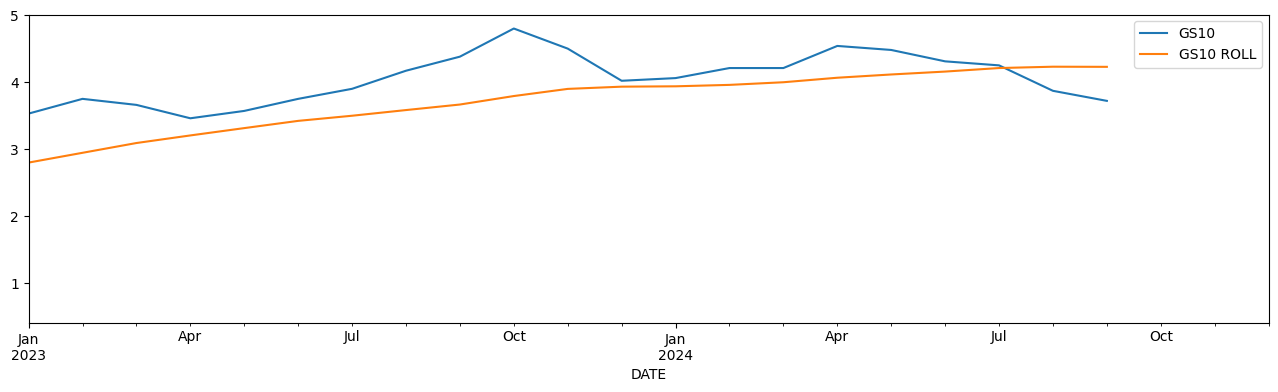

In [58]:
df[['GS10','GS10 ROLL']].plot(figsize = (16,4), xlim=['2023-01-01','2024-12-31'])

## Smoothing with rolling value 20

In [59]:
df['GS10 ROLL'] = df['GS10']. rolling(20).mean()

<Axes: xlabel='DATE'>

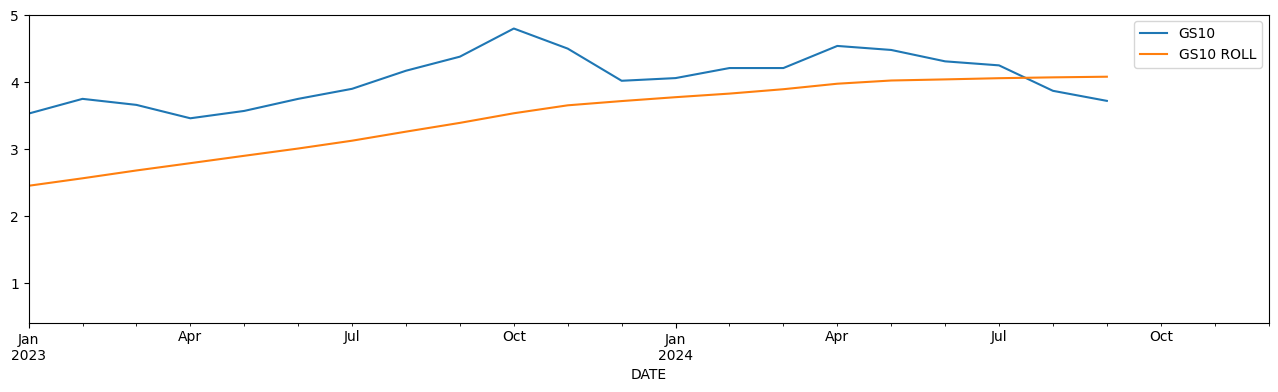

In [60]:
df[['GS10','GS10 ROLL']].plot(figsize = (16,4), xlim=['2023-01-01','2024-12-31'])

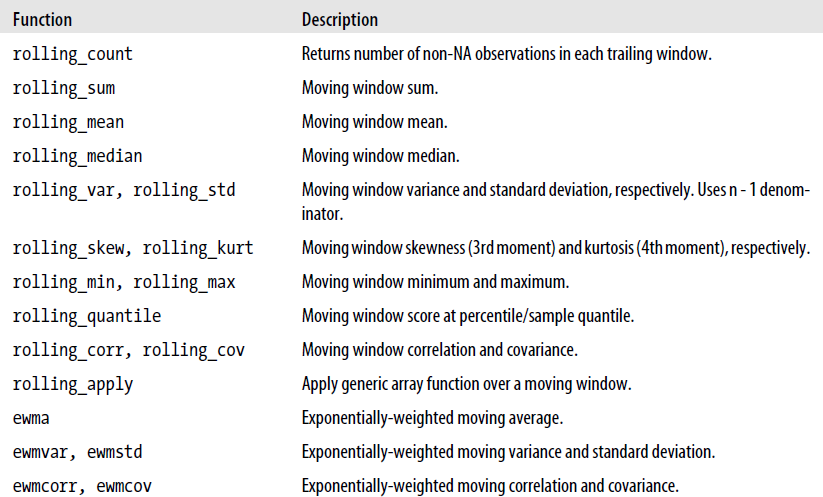